In [59]:
import numpy as np
import pandas as pd
from additional import DatasetGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.optimizers import Adam
from keras.metrics import RootMeanSquaredError

from sklearn.metrics import mean_squared_error
# from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler


import warnings
warnings.filterwarnings('ignore')

In [60]:
RELIANCE = pd.read_csv("D:/time-series-stock-pred/equities/AAKASH.csv")

In [61]:
RELIANCE.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1465,2024-04-24,11.10,11.25,10.70,11.15,11.15,471810
1466,2024-04-25,11.50,11.50,10.90,11.05,11.05,363737
1467,2024-04-26,11.30,11.30,10.60,10.80,10.80,441058
1468,2024-04-29,10.85,11.00,10.60,10.65,10.65,397213
1469,2024-04-30,10.90,11.15,10.75,11.10,11.10,608478


In [62]:
RELIANCE.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-15,3.603333,3.73,3.603333,3.73,3.73,60000
1,2018-05-16,3.730000,3.73,3.730000,3.73,3.73,0
2,2018-05-17,3.600000,3.60,3.600000,3.60,3.60,30000
3,2018-05-18,3.600000,3.60,3.600000,3.60,3.60,0
4,2018-05-21,3.600000,3.60,3.270000,3.27,3.27,90000


In [63]:
RELIANCE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1470 non-null   object 
 1   Open       1470 non-null   float64
 2   High       1470 non-null   float64
 3   Low        1470 non-null   float64
 4   Close      1470 non-null   float64
 5   Adj Close  1470 non-null   float64
 6   Volume     1470 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 80.5+ KB


In [64]:
RELIANCE["Date"] = pd.to_datetime(RELIANCE["Date"])

In [65]:
ed_date = '2023-06-01'
RELIANCE_Train_X, RELIANCE_Train_Y, RELIANCE_Test_X, RELIANCE_Test_Y,scale = DatasetGenerator.Dataset(RELIANCE, ed_date)

In [66]:
def LSTM_model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model

In [67]:
lstm = LSTM_model()
lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 200)            161600    
                                                                 
 lstm_3 (LSTM)               (None, 200)               320800    
                                                                 
 dense_4 (Dense)             (None, 200)               40200     
                                                                 
 dense_5 (Dense)             (None, 100)               20100     
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 5)                 255       
                                                                 
Total params: 548,005
Trainable params: 548,005
Non-tr

In [68]:
lstm.compile(optimizer=Adam(learning_rate=3e-4), loss = 'mse', metrics=[RootMeanSquaredError()])

In [69]:
history = lstm.fit(RELIANCE_Train_X,RELIANCE_Train_Y, epochs= 100,validation_data = (RELIANCE_Test_X, RELIANCE_Test_Y))

Epoch 1/100
8/8 [==============================] - 2s 77ms/step - loss: 0.1287 - root_mean_squared_error: 0.3588 - val_loss: 0.0416 - val_root_mean_squared_error: 0.2039
Epoch 2/100
8/8 [==============================] - 0s 35ms/step - loss: 0.1089 - root_mean_squared_error: 0.3300 - val_loss: 0.0240 - val_root_mean_squared_error: 0.1548
Epoch 3/100
8/8 [==============================] - 0s 33ms/step - loss: 0.0724 - root_mean_squared_error: 0.2691 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0733
Epoch 4/100
8/8 [==============================] - 0s 32ms/step - loss: 0.0399 - root_mean_squared_error: 0.1998 - val_loss: 0.0210 - val_root_mean_squared_error: 0.1448
Epoch 5/100
8/8 [==============================] - 0s 33ms/step - loss: 0.0275 - root_mean_squared_error: 0.1658 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0828
Epoch 6/100
8/8 [==============================] - 0s 33ms/step - loss: 0.0130 - root_mean_squared_error: 0.1141 - val_loss: 0.0018 - val_root_mean_sq

In [70]:
history_dict = history.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

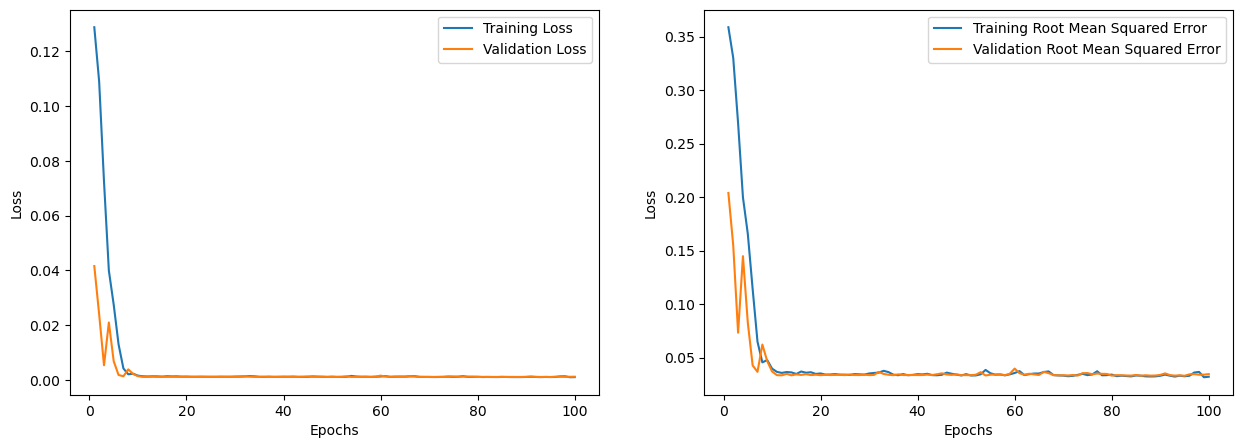

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

In [72]:
prediction_scaled = lstm.predict(RELIANCE_Test_X)

2/2 [==============================] - 0s 33ms/step


In [73]:
prediction_scaled = prediction_scaled.reshape(-1, 1)

In [74]:
prediction_scaled.shape

(215, 1)

In [75]:
prediction = prediction_scaled/scale

In [76]:
RELIANCE_Test_Y = RELIANCE_Test_Y/scale

In [77]:
RELIANCE['Date'][RELIANCE['Date'] >= '2023-06-13']

1254   2023-06-13
1255   2023-06-14
1256   2023-06-15
1257   2023-06-16
1258   2023-06-19
          ...    
1465   2024-04-24
1466   2024-04-25
1467   2024-04-26
1468   2024-04-29
1469   2024-04-30
Name: Date, Length: 216, dtype: datetime64[ns]

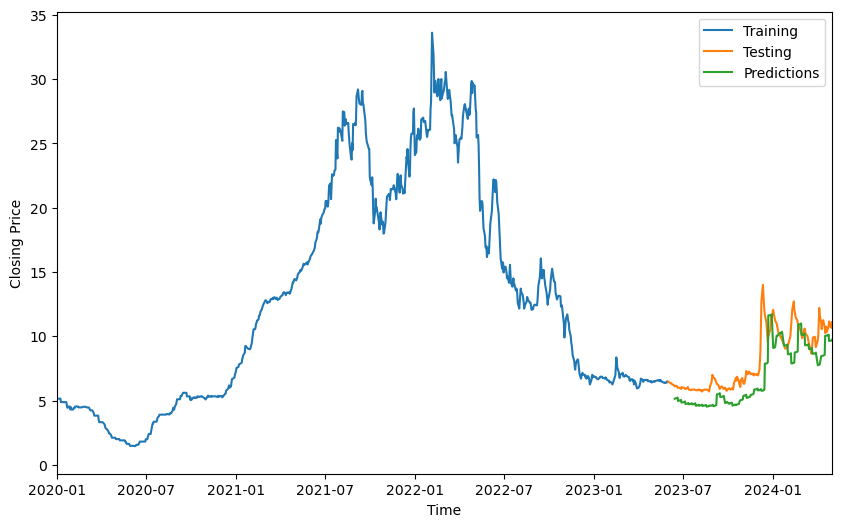

In [82]:
plt.figure(figsize=(10,6))
plt.plot(RELIANCE['Date'][RELIANCE['Date'] < '2023-06-01'], RELIANCE['Adj Close'][RELIANCE['Date'] < '2023-06-01'], label = 'Training')
plt.plot(RELIANCE['Date'][RELIANCE['Date'] >= '2023-06-01'], RELIANCE['Adj Close'][RELIANCE['Date'] >= '2023-06-01'], label = 'Testing')
plt.plot(RELIANCE['Date'][RELIANCE['Date'] >= '2023-06-14'], prediction.reshape(-1), label = 'Predictions')
plt.xlim(pd.Timestamp("2020-01-01"),pd.Timestamp("2024-04-30"))
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [22]:
RELIANCE_Test_Y.reshape(-1,5).shape

(42, 5)

In [23]:
prediction.reshape(-1,5).shape

(42, 5)

In [28]:
prediction.shape

(210, 1)

(210, 1)

In [37]:
prediction-rty

array([[ 0.10150617],
       [ 0.14790577],
       [ 0.22121042],
       [ 0.30566782],
       [ 0.40671819],
       [ 0.06561989],
       [ 0.06365818],
       [ 0.13659281],
       [ 0.26910728],
       [ 0.32501262],
       [ 0.09580129],
       [ 0.09346575],
       [ 0.16642994],
       [ 0.24620575],
       [ 0.15635914],
       [-0.02372462],
       [-0.02524239],
       [ 0.04751152],
       [ 0.12551016],
       [ 0.18815178],
       [ 0.05999321],
       [-0.04099423],
       [-0.06881005],
       [ 0.10842413],
       [ 0.22234386],
       [ 0.10634273],
       [ 0.15269655],
       [ 0.12547821],
       [ 0.15350717],
       [ 0.21703047],
       [-0.00983721],
       [-0.01034886],
       [ 0.01133531],
       [ 0.03601068],
       [ 0.15201515],
       [ 0.04828542],
       [ 0.04552215],
       [ 0.01876348],
       [ 0.04308695],
       [ 0.15760225],
       [-0.0267368 ],
       [ 0.07252735],
       [ 0.04438251],
       [ 0.16993994],
       [ 0.18472952],
       [-0

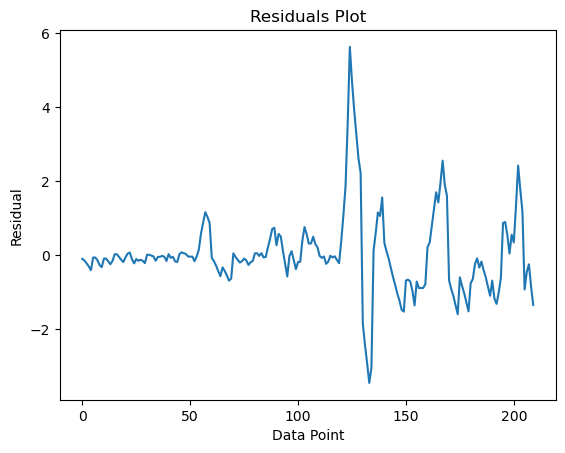

In [34]:
rty = RELIANCE_Test_Y.reshape(-1,1)
residuals = rty - prediction

# Plot residuals
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Data Point')
plt.ylabel('Residual')
plt.show()

In [24]:
import math
rmse = math.sqrt(mean_squared_error(RELIANCE_Test_Y.reshape(-1, 5),prediction.reshape(-1,5)))
mape = np.mean(np.abs(prediction.reshape(-1,5) - RELIANCE_Test_Y.reshape(-1, 5))/np.abs(RELIANCE_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 1.0782784743984244
MAPE: 0.0770064579118978


In [81]:
lstm.save("model.h5")

## Prediction for test

In [157]:
df_training = pd.DataFrame(RELIANCE_Train_X.reshape(-1,1),columns=['Close'])
df_testing = pd.DataFrame(RELIANCE_Test_X.reshape(-1,1),columns=['Close'])
print(df_training.shape,df_testing.shape)

(6885, 1) (210, 1)


In [158]:
past_500_days = df_training.tail(500) #past 500 days
final_df = past_500_days._append(df_testing,ignore_index=True)

In [159]:
input_data = final_df
input_data = np.array(input_data)
input_data.shape

(710, 1)

In [160]:
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [161]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape,y_test.shape)

(610, 100, 1) (610,)


In [162]:
y_predicted = lstm.predict(x_test)

20/20 [==============================] - 1s 36ms/step


In [163]:
y_predicted = y_predicted/scale
y_test = y_test/scale

In [164]:
y_predicted

array([[4177.4453, 4158.348 , 4182.704 , 4117.8945, 4165.85  ],
       [4201.1978, 4181.967 , 4206.5444, 4141.18  , 4188.4424],
       [4224.556 , 4205.296 , 4230.1807, 4164.7344, 4212.433 ],
       ...,
       [4933.9287, 4909.0723, 4936.246 , 4850.4614, 4909.417 ],
       [4939.559 , 4914.579 , 4942.2227, 4855.9077, 4916.387 ],
       [4939.661 , 4914.714 , 4942.23  , 4856.0996, 4916.7817]],
      dtype=float32)

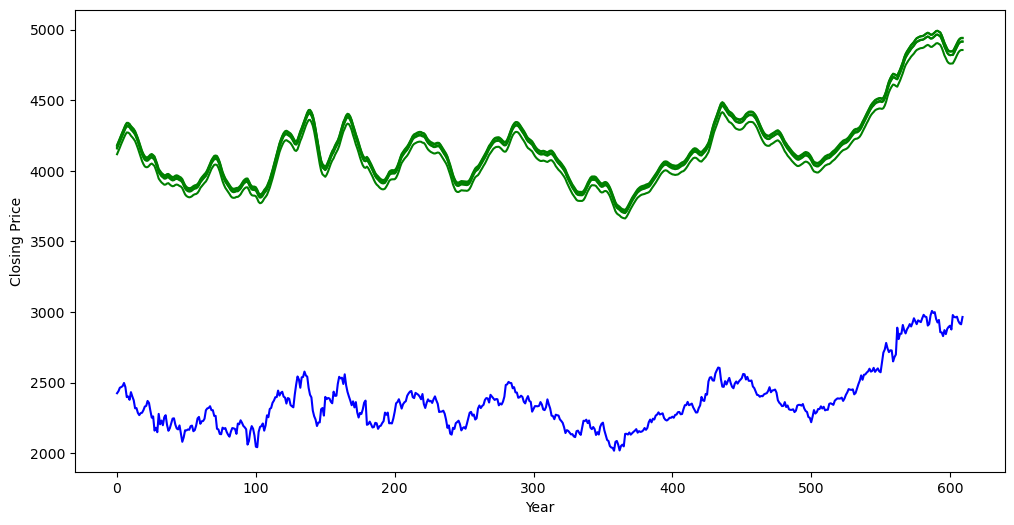

In [165]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted,'g',label = 'Predicted Price')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.show()


## Model Optimization

In [65]:
import math
def scheduler(epoch):

  if epoch <= 150:
    lrate = (10 ** -5) * (epoch / 150)
  elif epoch <= 400:
    initial_lrate = (10 ** -5)
    k = 0.01
    lrate = initial_lrate * math.exp(-k * (epoch - 150))
  else:
    lrate = (10 ** -6)

  return lrate

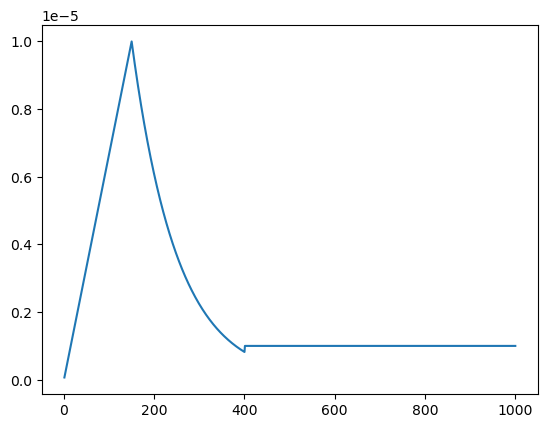

In [66]:
epochs = [i for i in range(1, 1001, 1)]
lrate = [scheduler(i) for i in range(1, 1001, 1)]
plt.plot(epochs, lrate)

In [67]:
opt_lstm = LSTM_model()
opt_lstm.compile(optimizer=Adam(), loss = 'mse', metrics=RootMeanSquaredError())

In [68]:
history_opt = opt_lstm.fit(RELIANCE_Train_X, RELIANCE_Train_Y, epochs = 1000, validation_data = (RELIANCE_Test_X, RELIANCE_Test_Y), callbacks=LearningRateScheduler(scheduler
                                                                                                                                                                    ))

Epoch 1/1000
44/44 [==============================] - 4s 36ms/step - loss: 0.0987 - root_mean_squared_error: 0.3141 - val_loss: 0.9912 - val_root_mean_squared_error: 0.9956 - lr: 0.0000e+00
Epoch 2/1000
44/44 [==============================] - 1s 30ms/step - loss: 0.0986 - root_mean_squared_error: 0.3141 - val_loss: 0.9911 - val_root_mean_squared_error: 0.9955 - lr: 6.6667e-08
Epoch 3/1000
44/44 [==============================] - 1s 28ms/step - loss: 0.0986 - root_mean_squared_error: 0.3140 - val_loss: 0.9909 - val_root_mean_squared_error: 0.9954 - lr: 1.3333e-07
Epoch 4/1000
44/44 [==============================] - 1s 28ms/step - loss: 0.0986 - root_mean_squared_error: 0.3140 - val_loss: 0.9905 - val_root_mean_squared_error: 0.9952 - lr: 2.0000e-07
Epoch 5/1000
44/44 [==============================] - 1s 28ms/step - loss: 0.0985 - root_mean_squared_error: 0.3139 - val_loss: 0.9899 - val_root_mean_squared_error: 0.9950 - lr: 2.6667e-07
Epoch 6/1000
44/44 [==============================

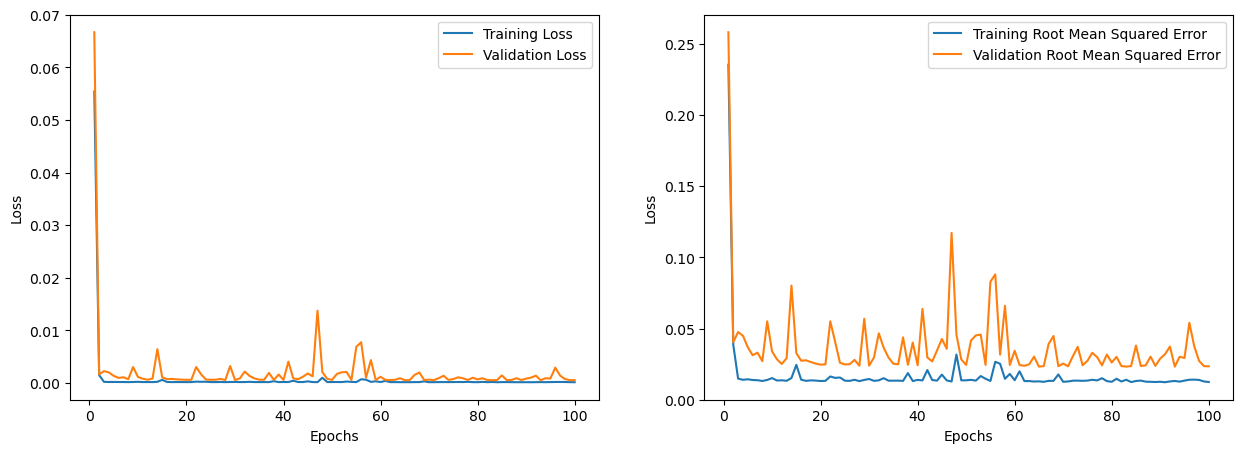

In [69]:
history_dict_2 = history.history

loss = history_dict_2["loss"]
root_mean_squared_error = history_dict_2["root_mean_squared_error"]
val_loss = history_dict_2["val_loss"]
val_root_mean_squared_error = history_dict_2["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

In [70]:
prediction_1 =opt_lstm.predict(RELIANCE_Test_X) 

2/2 [==============================] - 0s 6ms/step


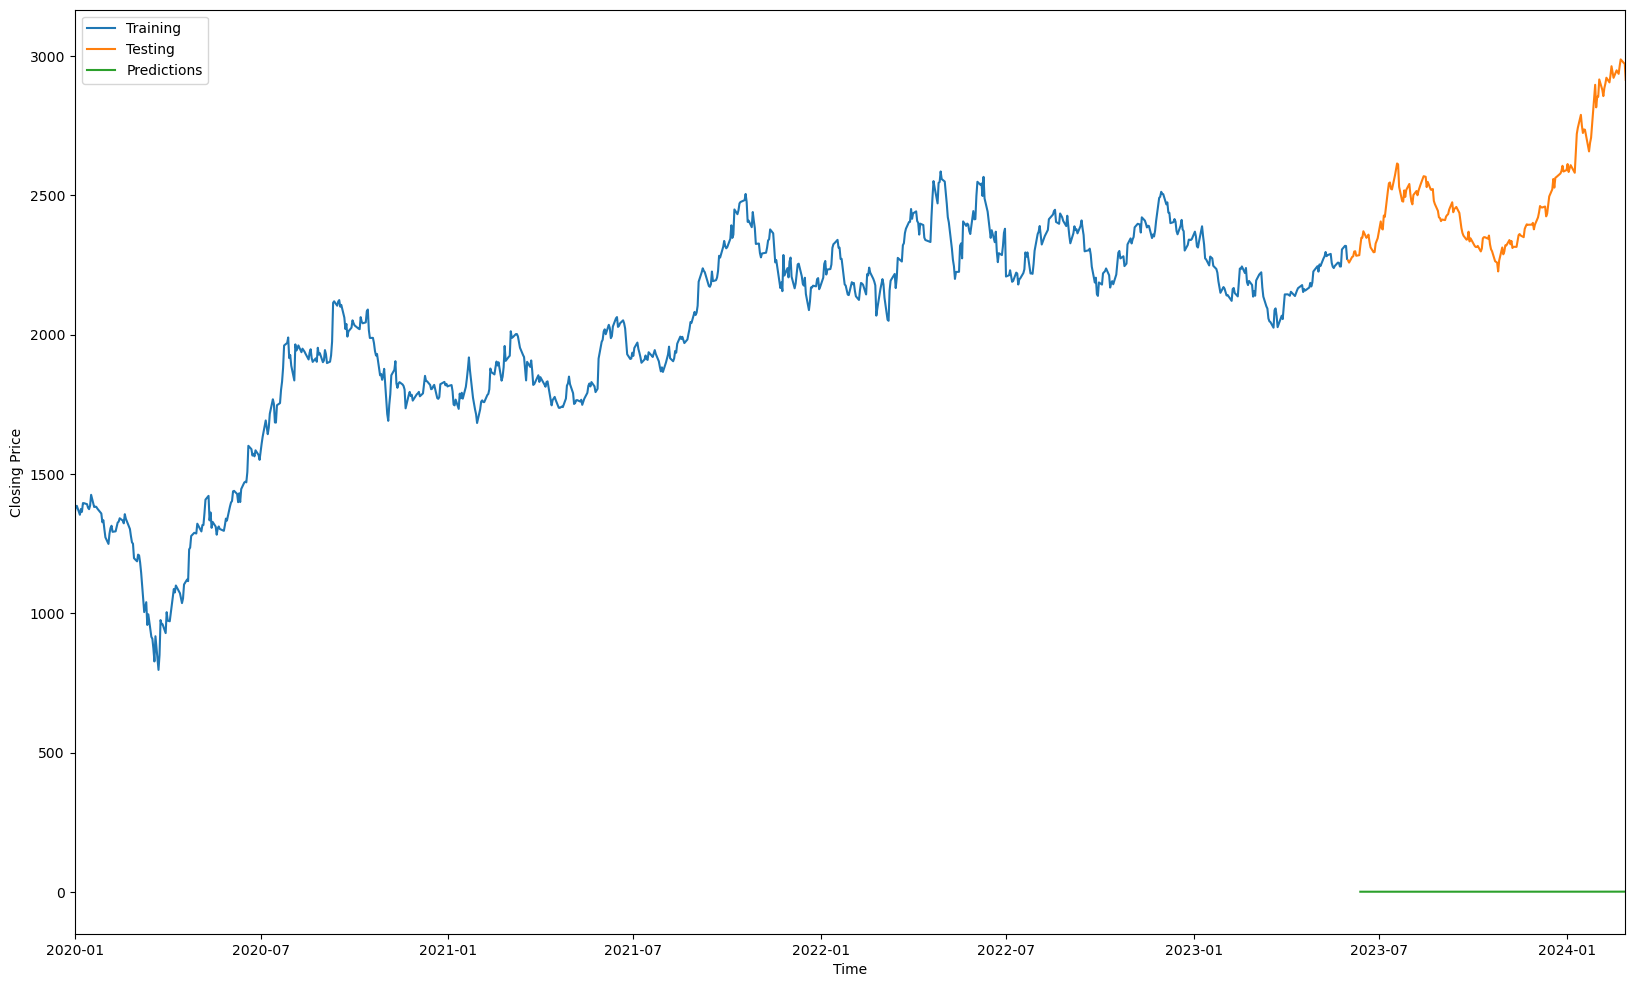

In [71]:
plt.figure(figsize=(20,12))
plt.plot(RELIANCE['Date'][RELIANCE['Date'] < '2023-06-01'], RELIANCE['Adj Close'][RELIANCE['Date'] < '2023-06-01'], label = 'Training')
plt.plot(RELIANCE['Date'][RELIANCE['Date'] >= '2023-06-01'], RELIANCE['Adj Close'][RELIANCE['Date'] >= '2023-06-01'], label = 'Testing')
plt.plot(RELIANCE['Date'][RELIANCE['Date'] >= '2023-06-13'], prediction_1.reshape(-1), label = 'Predictions')
plt.xlim(pd.Timestamp("2020-01-01"),pd.Timestamp("2024-02-27"))
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [72]:
import math
rmse = math.sqrt(mean_squared_error(RELIANCE_Test_Y.reshape(-1, 5),prediction_1))
mape = np.mean(np.abs(prediction_1 - RELIANCE_Test_Y.reshape(-1, 5))/np.abs(RELIANCE_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 0.024703299409753767
MAPE: 0.020083583072648976


## Optimization - 2 

In [73]:
opt_lstm_2 = LSTM_model()
opt_lstm_2.compile(optimizer=Adam(learning_rate=0.001), loss = 'mse', metrics=RootMeanSquaredError())

In [74]:
history_opt_2 = opt_lstm_2.fit(RELIANCE_Train_X, RELIANCE_Train_Y, epochs = 1000, validation_data = (RELIANCE_Test_X, RELIANCE_Test_Y))

Epoch 1/1000
44/44 [==============================] - 4s 37ms/step - loss: 0.0283 - root_mean_squared_error: 0.1682 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0739
Epoch 2/1000
44/44 [==============================] - 1s 30ms/step - loss: 4.0367e-04 - root_mean_squared_error: 0.0201 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0422
Epoch 3/1000
44/44 [==============================] - 1s 28ms/step - loss: 2.3527e-04 - root_mean_squared_error: 0.0153 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0325
Epoch 4/1000
44/44 [==============================] - 1s 28ms/step - loss: 1.9588e-04 - root_mean_squared_error: 0.0140 - val_loss: 6.0690e-04 - val_root_mean_squared_error: 0.0246
Epoch 5/1000
44/44 [==============================] - 1s 30ms/step - loss: 1.9864e-04 - root_mean_squared_error: 0.0141 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0337
Epoch 6/1000
44/44 [==============================] - 1s 27ms/step - loss: 2.3296e-04 - root_mean_squared_error: 0.

KeyboardInterrupt: 